In [56]:
import numpy as np
from numba import njit

class ImageHistPlotter:
    
    @classmethod
    def draw_img_hist(self,image, bins=256):
        hist, bins = self.calculate_hist(self.image.ravel(), self.bins, [0, 256])
        ax.plot(hist, color=color)
        ax.set_xlim([0, 256])
    
    @staticmethod
    def automatic_contrast_adjustment(hist, image, bins, range):
        """
        automatic contrast adjustment
        Args:
            image np.ndarray: image to adjust
        Returns: np.ndarray
        """
        a_low = min()
    
    @staticmethod
    @njit
    def compute_hist_for_channel(
                    image: np.ndarray,
                    #  bins: int,
                     ignote_part: float) -> np.ndarray:
        """
        compute histogram of image
        Args:
            image: np.ndarray - image to compute histogram
            bins: int - number of bins
            ignote_part: float - float number in range of [0..5]
        Returns: np.ndarray
        """
        
        image_h, image_w  = image.shape
        hist_rgb = np.zeros((256))
        
        for x in range(image_h):
            for y in range(image_w):
                i = image[x, y]               
                hist_rgb[i] += 1
        
        return hist_rgb

In [49]:
from PIL import Image

img = Image.open('test/test_data/sample_640×426.pnm')
img_array = np.array(img)

In [50]:
img_array.shape

(426, 640, 3)

In [53]:
# def auto_correction(img):
    
#     hist = ImageHistPlotter.compute_hist(img, 0)
#     a_low = min(h[i])


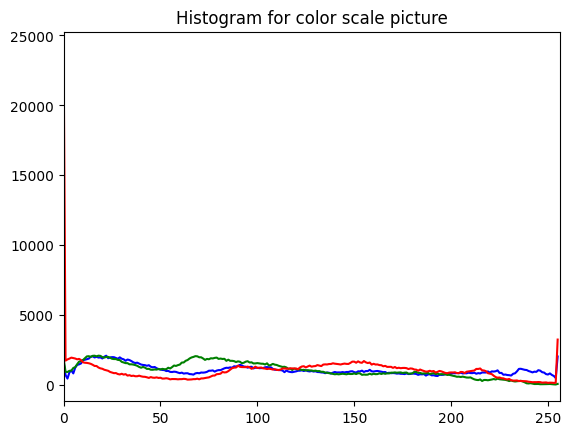

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
for channel,col in enumerate(color):
    channel_hist = ImageHistPlotter.compute_hist_for_channel(img_array[:, :, channel], 0)
    plt.plot(channel_hist, color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

In [55]:
cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

(426, 640)

In [58]:
def get_values(img: np.ndarray) -> tuple[int, int, int, int]:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    image_h, image_w  = image.shape
    hist = ImageHistPlotter.compute_hist(gray, 0)
    q_low, q_high = np.percentile(gray, [2, 98])
    temp_low = image_h * image_w * q_low
    temp_max = image_h * image_w  * (1 - q_high)
    a_min, a_max = min(hist), max(hist)
    a_low = min([hist[i] for i in range(len(hist)) if hist[i] >= temp_low])
    a_high = max([hist[i] for i in range(len(hist)) if hist[i] <= temp_max])
    return a_min, a_max, a_low, a_high

@njit
def _auto_correction(img: np.ndarray,
                     a_min: int,
                     a_max: int,
                     a_low: int,
                     a_high: int) -> np.ndarray:

    def formula(pixel: int) -> int:
        if pixel < a_low:
            value =  a_min
        elif a_low <= pixel <= a_high:
            value = a_min + (pixel - a_low) * (a_max - a_min) / (a_high - a_low)
        elif pixel > a_high:
            value = a_max
        return value
            
    pixels = map(formula, img)
    return np.array(list(pixels)).reshape(img.shape)
    
def auto_correction(img):
    a_min, a_max, a_low, a_high = get_values(img)
    img = _auto_correction(img, a_min, a_max, a_low, a_high)
    return img
    
    
    

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


color = ('b','g','r')
img_cv = auto_correction(np.array(img))
for channel,col in enumerate(color):
    histr = cv2.calcHist(images=[img_cv],
                         channels=[channel],
                         mask=None,
                         histSize=[256],
                         ranges=[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

NameError: name 'image' is not defined